## 라이브러리 로드

In [1]:
# 라이브러리 로드
# requests는 작은 웹브라우저로 웹사이트 내용을 가져옵니다.
import requests
# bs4에서 BeautifulSoup 을 bs 라는 별칭으로 읽어옵니다. 웹페이지를 파싱합니다.
from bs4 import BeautifulSoup as bs
# 크롤링 후 결과를 데이터프레임 형태로 보기 위해 판다스를 불러옵니다.
import pandas as pd

## 서울시 코로나19 발생동향
* [코로나19](http://www.seoul.go.kr/coronaV/coronaStatus.do)

## requests 로 html 문서 받아오기

In [2]:
# 크롤링 할 사이트
base_url = "http://www.seoul.go.kr/coronaV/coronaStatus.do"
response = requests.get( base_url )
soup = bs(response.text, 'html.parser')
soup

<!-- ######################################################################## -->
<!-- 
	menu name:		코로나 바이러스 현황 단독 페이지
-->
<!-- ######################################################################## -->
<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport">
<title>코로나19</title>
<meta content="코로나19" name="description"/>
<meta content="website" property="og:type"/>
<meta content="코로나19 - 2주간의 '잠시 멈춤' 캠페인" property="og:title"/>
<meta content="코로나19를 멈추기 위해 우리도 잠시 멈춰요." property="og:description"/>
<meta content="https://www.seoul.go.kr/coronaV/coronaStatus.do" property="og:url"/>
<meta content="http://www.seoul.go.kr/res_newseoul/images/corona/pic_facebook_20200304.jpg" property="og:image"/>
<meta content="summary" name="twitter:card"/>
<meta content="코로나19 - 2주간의 '잠시 멈춤' 캠페인" name="twitter:title"/>
<meta content="코로나19를 멈추기 위해 우리도 잠시 멈춰요." name="twitt

## 서울 확진자 현황

In [6]:
#move-cont1 > div:nth-child(2) > table
# tstyle05 tstyleP
table = soup.select('#move-cont1 > div > table')[0]
table

<table class="tstyle05 tstyleP"><caption>서울 확진자 현황</caption><thead><tr><th scope="col">연번</th><th scope="col">환자</th><th scope="col">확진일</th><th scope="col">성별(출생년)</th><th scope="col">거주지</th><th scope="col">여행력</th><th scope="col">접촉력</th><th scope="col">조치사항</th></tr></thead><tbody><tr><th scope="row">105</th><td data-tit="환자 번호" scope="col">확인중</td><td data-tit="확진일">3.4.</td><td data-tit="성별(출생년)">여('03)</td><td data-tit="거주지">강북구</td><td data-tit="여행력">-</td><td data-tit="접촉력">확인중</td><td data-tit="조치사항">-</td></tr><tr><th scope="row">104</th><td data-tit="환자 번호" scope="col">확인중</td><td data-tit="확진일">3.4.</td><td data-tit="성별(출생년)">남('84)</td><td data-tit="거주지">강북구</td><td data-tit="여행력">-</td><td data-tit="접촉력">타시도 확진자 접촉력</td><td data-tit="조치사항">-</td></tr><tr><th scope="row">103</th><td data-tit="환자 번호" scope="col">확인중</td><td data-tit="확진일">3.4.</td><td data-tit="성별(출생년)">여('71)</td><td data-tit="거주지">용산구</td><td data-tit="여행력">-</td><td data-tit="접촉력">#4558 접촉자</td><td data

In [9]:
# trs
trs = table.select('tr')
len(trs)

105

In [10]:
# 컬럼명
trs[0]

<tr><th scope="col">연번</th><th scope="col">환자</th><th scope="col">확진일</th><th scope="col">성별(출생년)</th><th scope="col">거주지</th><th scope="col">여행력</th><th scope="col">접촉력</th><th scope="col">조치사항</th></tr>

In [11]:
# 강북구 확진자
trs[1]

<tr><th scope="row">105</th><td data-tit="환자 번호" scope="col">확인중</td><td data-tit="확진일">3.4.</td><td data-tit="성별(출생년)">여('03)</td><td data-tit="거주지">강북구</td><td data-tit="여행력">-</td><td data-tit="접촉력">확인중</td><td data-tit="조치사항">-</td></tr>

In [13]:
# 첫번째 확진자
trs_0 = trs[-1]
trs_0

<tr><th scope="row">1</th><td data-tit="환자 번호" scope="col">2</td><td data-tit="확진일">1.23.</td><td data-tit="성별(출생년)">남(‵64)</td><td data-tit="거주지">강서구</td><td data-tit="여행력">중국 우한시</td><td data-tit="접촉력">해외접촉</td><td data-tit="조치사항">국립중앙의료원(<b style="color: #4b6edd; font-weight: normal;">퇴원</b>)</td></tr>

In [16]:
row = []
for td in trs_0:
    td_text = td.get_text()
    row.append(td_text)
row

['1', '2', '1.23.', '남(‵64)', '강서구', '중국 우한시', '해외접촉', '국립중앙의료원(퇴원)']

In [17]:
# td정보를 함수로 받아오도록 만듭니다.
def find_tds(tr):
    row = []
    for td in tr:
        td_text = td.get_text()
        row.append(td_text)
    return row

find_tds(trs[6])

['100', '확인중', '3.1.', "여('96)", '동대문구', '-', '대구 방문', '서북병원']

In [25]:
# 0번째 행을 빼고 크롤링
table = []
for i, tr in enumerate(trs):
    if i > 0 :
        td_list = find_tds(tr)
        table.append(td_list)
    
table

[['105', '확인중', '3.4.', "여('03)", '강북구', '-', '확인중', '-'],
 ['104', '확인중', '3.4.', "남('84)", '강북구', '-', '타시도 확진자 접촉력', '-'],
 ['103', '확인중', '3.4.', "여('71)", '용산구', '-', '#4558 접촉자', '-'],
 ['102', '확인중', '3.4.', "남('97)", '동대문구', '이탈리아, 독일, 홍콩', '해외\xa0접촉', '서북병원'],
 ['101', '확인중', '3.4.', "여('05)", '중랑구', '-', '타시도 확진자 접촉', '서울의료원'],
 ['100', '확인중', '3.1.', "여('96)", '동대문구', '-', '대구 방문', '서북병원'],
 ['99', '확인중', '3.3.', "남('85)", '동대문구', '-', '-', '서북병원'],
 ['98', '4743', '3.2.', "남('66)", '서초구', '-', '확인중', '서울의료원'],
 ['97', '4709', '3.1.', "남('85)", '양천구', '-', '타시도 확진자 접촉', '서울의료원'],
 ['96', '4645', '3.2.', "남('82)", '도봉구', '-', '확인중', '서울의료원'],
 ['95', '4634', '3.2.', "여('99)", '성북구', '-', '성동구 아파트 관련', '서울의료원'],
 ['94', '4558', '3.2.', '여(69)', '성북구', '-', '성동구 아파트 관련', '서울의료원'],
 ['93', '4517', '3.2.', "여('69)", '강남구', '-', '부동산중개법인관련', '서울의료원'],
 ['92', '4224', '3.2.', "남('00)", '영등포구', '-', '성동구 아파트 관련', '서북병원'],
 ['91', '4174', '2.29.', "남('72)", '영등포구', '-', '여의도 건설현장관련',

In [20]:
# table 데이터를 가져와 row에 담기
# tr에 있는 행동을 list에 담아줍니다.
# table = []
# for tr in trs:
#     td_list = find_tds(tr)
#     table.append(td_list)
    
# table

[['연번', '환자', '확진일', '성별(출생년)', '거주지', '여행력', '접촉력', '조치사항'],
 ['105', '확인중', '3.4.', "여('03)", '강북구', '-', '확인중', '-'],
 ['104', '확인중', '3.4.', "남('84)", '강북구', '-', '타시도 확진자 접촉력', '-'],
 ['103', '확인중', '3.4.', "여('71)", '용산구', '-', '#4558 접촉자', '-'],
 ['102', '확인중', '3.4.', "남('97)", '동대문구', '이탈리아, 독일, 홍콩', '해외\xa0접촉', '서북병원'],
 ['101', '확인중', '3.4.', "여('05)", '중랑구', '-', '타시도 확진자 접촉', '서울의료원'],
 ['100', '확인중', '3.1.', "여('96)", '동대문구', '-', '대구 방문', '서북병원'],
 ['99', '확인중', '3.3.', "남('85)", '동대문구', '-', '-', '서북병원'],
 ['98', '4743', '3.2.', "남('66)", '서초구', '-', '확인중', '서울의료원'],
 ['97', '4709', '3.1.', "남('85)", '양천구', '-', '타시도 확진자 접촉', '서울의료원'],
 ['96', '4645', '3.2.', "남('82)", '도봉구', '-', '확인중', '서울의료원'],
 ['95', '4634', '3.2.', "여('99)", '성북구', '-', '성동구 아파트 관련', '서울의료원'],
 ['94', '4558', '3.2.', '여(69)', '성북구', '-', '성동구 아파트 관련', '서울의료원'],
 ['93', '4517', '3.2.', "여('69)", '강남구', '-', '부동산중개법인관련', '서울의료원'],
 ['92', '4224', '3.2.', "남('00)", '영등포구', '-', '성동구 아파트 관련', '서북병원'],

## 데이터프레임으로 만들기

In [22]:
cols = find_tds(trs[0])
cols

['연번', '환자', '확진일', '성별(출생년)', '거주지', '여행력', '접촉력', '조치사항']

In [26]:
df = pd.DataFrame(table, columns = cols)
df.shape

(104, 8)

In [27]:
df.head()

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항
0,105,확인중,3.4.,여('03),강북구,-,확인중,-
1,104,확인중,3.4.,남('84),강북구,-,타시도 확진자 접촉력,-
2,103,확인중,3.4.,여('71),용산구,-,#4558 접촉자,-
3,102,확인중,3.4.,남('97),동대문구,"이탈리아, 독일, 홍콩",해외 접촉,서북병원
4,101,확인중,3.4.,여('05),중랑구,-,타시도 확진자 접촉,서울의료원


In [28]:
df.tail()

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항
99,5,9,1.31.,여(‵92),성북구,-,#5 접촉자,서울의료원(퇴원)
100,4,7,1.30.,남(‵91),마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
101,3,6,1.30.,남(‵64),종로구,-,#3 접촉자,서울대학교병원(퇴원)
102,2,5,1.30.,남(‵87),중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)
103,1,2,1.23.,남(‵64),강서구,중국 우한시,해외접촉,국립중앙의료원(퇴원)


## CSV 파일로 저장하기

In [31]:
# csv 파일로 저장하기
df.to_csv('seoul-covid-19.csv', index = False)

In [32]:
# csv 파일로 제대로 저장되었는지 읽어와서 확인하기
pd.read_csv('seoul-covid-19.csv')

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항
0,105,확인중,3.4.,여('03),강북구,-,확인중,-
1,104,확인중,3.4.,남('84),강북구,-,타시도 확진자 접촉력,-
2,103,확인중,3.4.,여('71),용산구,-,#4558 접촉자,-
3,102,확인중,3.4.,남('97),동대문구,"이탈리아, 독일, 홍콩",해외 접촉,서북병원
4,101,확인중,3.4.,여('05),중랑구,-,타시도 확진자 접촉,서울의료원
...,...,...,...,...,...,...,...,...
99,5,9,1.31.,여(‵92),성북구,-,#5 접촉자,서울의료원(퇴원)
100,4,7,1.30.,남(‵91),마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
101,3,6,1.30.,남(‵64),종로구,-,#3 접촉자,서울대학교병원(퇴원)
102,2,5,1.30.,남(‵87),중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


## EDA

In [38]:
import seaborn as sns
sns.set(font='Malgun Gothic')

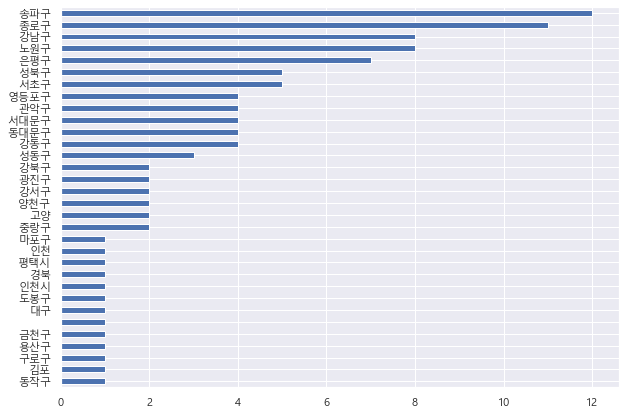

In [43]:
df['거주지'].value_counts().sort_values().plot.barh(figsize=(10,7))

In [44]:
df['조치사항'].value_counts()

서울의료원          30
서울의료원(퇴원)       9
국립중앙의료원(퇴원)     7
국립중앙의료원         7
서울대학교병원         7
보라매병원           6
서울대학교병원(퇴원)     5
서북병원            4
서남병원            3
중앙대학교병원         3
-               3
타시도이관           3
보라매병원(퇴원)       2
삼육서울병원          2
인제대상계백병원        2
한일병원            2
고대구로병원          2
중앙대학교병원(퇴원)     1
한양대학교병원(퇴원)     1
한일병원(퇴원)        1
서울백병원           1
한양대학교병원         1
순천향서울병원         1
상계백병원           1
Name: 조치사항, dtype: int64

In [46]:
df['확진일'].value_counts()

2.25.     16
2.27.     11
2.26.     10
2.28.      7
3.1.       6
3.2.       6
3.4.       5
2.29.      5
2.20.      5
2.23.      4
2.22.      4
1.30.      3
1.31.      3
2.24.      3
2.19.      2
2.5.       2
2.16.      2
2.21.      2
1.23.      1
2.2.       1
2.27       1
2.7.       1
3.3.       1
2.25       1
2.6.       1
2.24..     1
Name: 확진일, dtype: int64

In [48]:
df['확진일자'] = pd.to_datetime('2020' + '-' + df['확진일'].str.replace('.','-'))
df['확진일자'].head()

0   2020-03-04
1   2020-03-04
2   2020-03-04
3   2020-03-04
4   2020-03-04
Name: 확진일자, dtype: datetime64[ns]

In [49]:
df['월일'] = df['확진일자'].astype(str).map(lambda x : x[-5:])

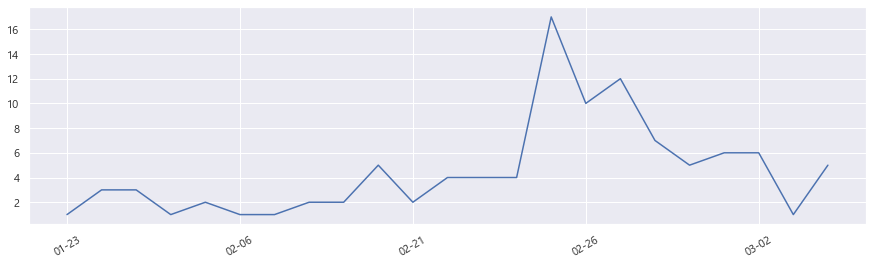

In [53]:
df['월일'].value_counts().sort_index().plot(figsize=(15,4),rot=30)

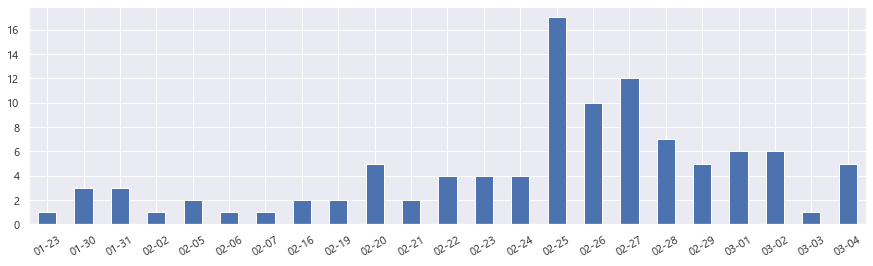

In [54]:
df['월일'].value_counts().sort_index().plot.bar(figsize=(15,4),rot=30)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
sns.countplot(data=df, x='확진일')